In [160]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [10]:
df = pd.read_csv('DF_2NE1.CSV')

In [11]:
df.head()

,2NE1_zh.wikipedia.org_all-access_spider,date_idx
0,18,7/1/2015
1,11,7/2/2015
2,5,7/3/2015
3,13,7/4/2015
4,14,7/5/2015


In [12]:
df.dtypes

2NE1_zh.wikipedia.org_all-access_spider     int64
date_idx                                   object
dtype: object

In [13]:
df['date_idx'] = pd.to_datetime(df['date_idx'], infer_datetime_format=True)

In [14]:
df.dtypes

2NE1_zh.wikipedia.org_all-access_spider             int64
date_idx                                   datetime64[ns]
dtype: object

No handles with labels found to put in legend.


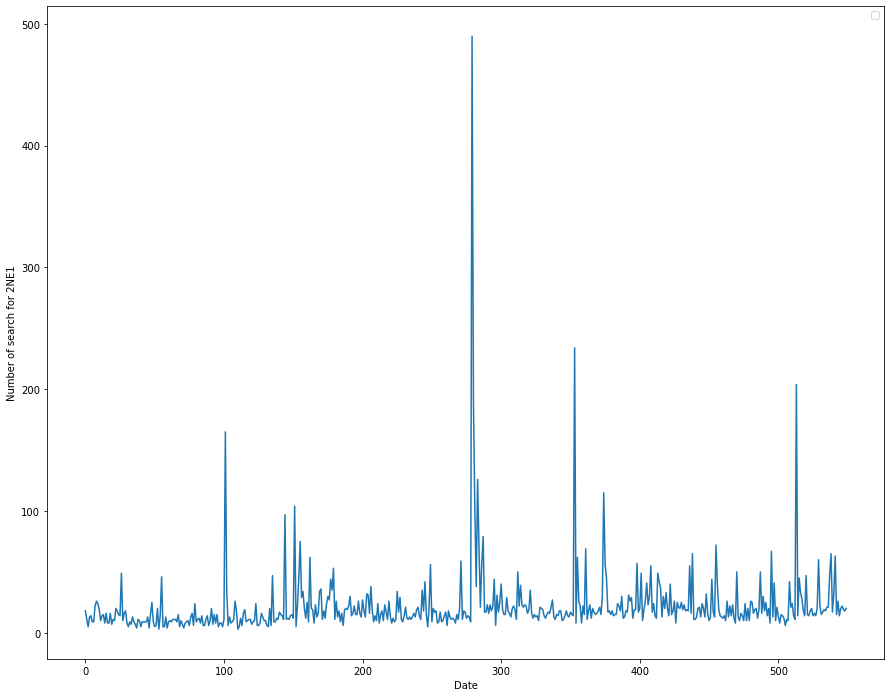

In [15]:
plt.figure(figsize=(15,12))
plt.xlabel('Date')
plt.ylabel('Number of search for 2NE1')
plt.title('')
plt.legend(loc='best')
plt.plot(df['2NE1_zh.wikipedia.org_all-access_spider'])

In [16]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [17]:
train_size = 0.8
df_train = df[:int(len(df)*0.8)]
df_test = df[int(len(df)*0.8):]

In [18]:
df_train.tail()

,2NE1_zh.wikipedia.org_all-access_spider,date_idx
435,18,2016-09-08
436,55,2016-09-09
437,16,2016-09-10
438,65,2016-09-11
439,11,2016-09-12


In [19]:
df_test.head()

,2NE1_zh.wikipedia.org_all-access_spider,date_idx
440,11,2016-09-13
441,13,2016-09-14
442,20,2016-09-15
443,21,2016-09-16
444,13,2016-09-17


In [20]:
len(df)

550

In [21]:
len(df_train)

440

In [22]:
len(df_test)

110

In [37]:
df_test.iloc[0]['2NE1_zh.wikipedia.org_all-access_spider']

11

In [39]:
df_test[0:3]['2NE1_zh.wikipedia.org_all-access_spider']

440    11
441    13
442    20
Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64

           Features                Target Value
---------------------------        -------------
ts(t-3)   ts(t-2)  ts(t-1)           ts(t)
ts(t-2)   ts(t-1)  ts(t)             ts(t+1)
ts(t-1)   ts(t)    ts(t+1)           ts(t+2)
ts(t)     ts(t+1)  ts(t+2)           ts(t+3)

In [65]:
window_size = 3
data_X, data_Y = [], []
for i in range(len(df_train) - window_size - 1): # 440-3-1=436
    a = df_train[i:(i + window_size)]['2NE1_zh.wikipedia.org_all-access_spider']
    data_X.append(a)
    data_Y.append(df_train.loc[i + window_size]['2NE1_zh.wikipedia.org_all-access_spider'])

In [66]:
data_X

[0    18
 1    11
 2     5
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 1    11
 2     5
 3    13
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 2     5
 3    13
 4    14
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 3    13
 4    14
 5     9
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 4    14
 5     9
 6     9
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 5     9
 6     9
 7    22
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 6     9
 7    22
 8    26
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 7    22
 8    26
 9    24
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 8     26
 9     24
 10    19
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 9     24
 10    19
 11    10
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 10    19
 11    10
 12    14
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 11    10
 1

In [67]:
data_Y

[13,
 14,
 9,
 9,
 22,
 26,
 24,
 19,
 10,
 14,
 15,
 8,
 16,
 8,
 8,
 16,
 7,
 11,
 10,
 20,
 18,
 15,
 14,
 49,
 10,
 16,
 18,
 8,
 5,
 9,
 7,
 13,
 9,
 7,
 4,
 11,
 10,
 5,
 9,
 9,
 9,
 9,
 13,
 4,
 15,
 25,
 9,
 5,
 6,
 20,
 3,
 14,
 46,
 5,
 5,
 13,
 4,
 9,
 10,
 9,
 11,
 11,
 11,
 9,
 15,
 5,
 10,
 7,
 4,
 8,
 9,
 10,
 6,
 13,
 16,
 6,
 24,
 9,
 11,
 12,
 8,
 14,
 6,
 6,
 11,
 14,
 6,
 10,
 20,
 7,
 15,
 8,
 15,
 5,
 8,
 8,
 5,
 11,
 165,
 34,
 6,
 13,
 8,
 9,
 11,
 26,
 18,
 3,
 5,
 12,
 6,
 16,
 19,
 9,
 10,
 11,
 11,
 7,
 9,
 10,
 24,
 6,
 6,
 8,
 16,
 13,
 10,
 10,
 6,
 5,
 20,
 6,
 47,
 9,
 9,
 12,
 11,
 17,
 15,
 14,
 11,
 97,
 11,
 12,
 11,
 14,
 15,
 12,
 104,
 5,
 22,
 45,
 75,
 29,
 34,
 20,
 12,
 25,
 9,
 62,
 20,
 19,
 8,
 23,
 13,
 16,
 34,
 36,
 11,
 18,
 12,
 24,
 30,
 27,
 44,
 35,
 53,
 11,
 26,
 13,
 18,
 9,
 16,
 6,
 19,
 20,
 19,
 22,
 30,
 14,
 16,
 22,
 15,
 15,
 26,
 16,
 13,
 27,
 18,
 13,
 32,
 31,
 16,
 38,
 18,
 9,
 14,
 10,
 24,
 8,
 15,
 18,
 10,
 23,

In [68]:
len(data_X)

436

In [69]:
len(data_Y)

436

In [82]:
# This function can only be used for df_train. As df_test starts from 440 (its range index), 
# it will fail at dataset.loc[i + window_size][col_name]
# For df_test add df_test.index.start to i in .loc[] part.
def create_dataset(dataset, col_name = '2NE1_zh.wikipedia.org_all-access_spider', window_size = 3):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1): 
        a = dataset[i:(i + window_size)][col_name]
        data_X.append(a)
        data_Y.append(dataset.loc[i + window_size][col_name])
    return(np.array(data_X), np.array(data_Y))

In [83]:
#  df_train[436:(436 + 3)]['2NE1_zh.wikipedia.org_all-access_spider']

In [84]:
# df_train.loc[1 + 3]['2NE1_zh.wikipedia.org_all-access_spider']

In [87]:
# Create test and training sets for one-step-ahead regression.
window_size = 3
col_name = '2NE1_zh.wikipedia.org_all-access_spider'
train_X, train_Y = create_dataset(df_train, col_name, window_size=3)
print("Original training data shape:")
print(train_X.shape)

Original training data shape:
(436, 3)


In [117]:
# df_test.head()

In [118]:
# df_test[0:3]

In [119]:
# df_test.head()

In [121]:
df_test.loc[440+3]['2NE1_zh.wikipedia.org_all-access_spider']

21

In [122]:
df_test.index.start

440

In [132]:
window_size = 3
test_X, test_Y = [], []
for i in range(len(df_test) - window_size - 1): # 110-3-1=106
    a = df_test[i:(i + window_size)]['2NE1_zh.wikipedia.org_all-access_spider']
    test_X.append(a)
    test_Y.append(df_test.loc[df_test.index.start + i + window_size]['2NE1_zh.wikipedia.org_all-access_spider'])

test_X = np.array(test_X) 
test_Y = np.array(test_Y)

In [133]:
test_X

array([[ 11,  13,  20],
       [ 13,  20,  21],
       [ 20,  21,  13],
       [ 21,  13,  24],
       [ 13,  24,  20],
       [ 24,  20,  13],
       [ 20,  13,  32],
       [ 13,  32,  16],
       [ 32,  16,  10],
       [ 16,  10,  13],
       [ 10,  13,  44],
       [ 13,  44,  17],
       [ 44,  17,  13],
       [ 17,  13,  72],
       [ 13,  72,  40],
       [ 72,  40,  19],
       [ 40,  19,  14],
       [ 19,  14,  13],
       [ 14,  13,  12],
       [ 13,  12,  14],
       [ 12,  14,  10],
       [ 14,  10,  26],
       [ 10,  26,  13],
       [ 26,  13,  22],
       [ 13,  22,  14],
       [ 22,  14,  23],
       [ 14,  23,  12],
       [ 23,  12,   8],
       [ 12,   8,  50],
       [  8,  50,  13],
       [ 50,  13,  10],
       [ 13,  10,  16],
       [ 10,  16,  14],
       [ 16,  14,  10],
       [ 14,  10,  24],
       [ 10,  24,  10],
       [ 24,  10,  20],
       [ 10,  20,  10],
       [ 20,  10,  26],
       [ 10,  26,  25],
       [ 26,  25,  16],
       [ 25,  16

In [124]:
train_X.shape

(436, 3)

### Reshaping data to feed LSTM model

In [125]:
# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))

In [126]:
train_X.shape

(436, 1, 3)

In [127]:
train_X

array([[[18, 11,  5]],

       [[11,  5, 13]],

       [[ 5, 13, 14]],

       ...,

       [[18, 19, 18]],

       [[19, 18, 55]],

       [[18, 55, 16]]], dtype=int64)

In [134]:
test_X.shape

(106, 3)

In [135]:
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [136]:
train_X

array([[[18, 11,  5]],

       [[11,  5, 13]],

       [[ 5, 13, 14]],

       ...,

       [[18, 19, 18]],

       [[19, 18, 55]],

       [[18, 55, 16]]], dtype=int64)

In [137]:
model = Sequential()   
model.add(LSTM(4, input_shape = (1, window_size)))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")

In [139]:
model.fit(train_X, train_Y, epochs = 100, batch_size = 1, verbose = 2)

Epoch 1/100
436/436 - 0s - loss: 1369.2135
Epoch 2/100
436/436 - 1s - loss: 1322.4124
Epoch 3/100
436/436 - 1s - loss: 1280.8822
Epoch 4/100
436/436 - 1s - loss: 1241.1510
Epoch 5/100
436/436 - 0s - loss: 1212.9004
Epoch 6/100
436/436 - 1s - loss: 1188.1447
Epoch 7/100
436/436 - 1s - loss: 1166.6187
Epoch 8/100
436/436 - 1s - loss: 1147.4189
Epoch 9/100
436/436 - 0s - loss: 1129.8651
Epoch 10/100
436/436 - 1s - loss: 1113.8655
Epoch 11/100
436/436 - 1s - loss: 1099.4181
Epoch 12/100
436/436 - 0s - loss: 1086.1171
Epoch 13/100
436/436 - 1s - loss: 1075.1249
Epoch 14/100
436/436 - 0s - loss: 1063.3114
Epoch 15/100
436/436 - 0s - loss: 1053.6068
Epoch 16/100
436/436 - 0s - loss: 1044.7964
Epoch 17/100
436/436 - 1s - loss: 1036.8827
Epoch 18/100
436/436 - 1s - loss: 1029.6108
Epoch 19/100
436/436 - 1s - loss: 1023.1899
Epoch 20/100
436/436 - 1s - loss: 1017.2522
Epoch 21/100
436/436 - 1s - loss: 1012.1529
Epoch 22/100
436/436 - 0s - loss: 1007.6694
Epoch 23/100
436/436 - 1s - loss: 1004.22

In [142]:
print(model.metrics)

In [147]:
pred = model.predict(test_X,batch_size=1, verbose=1)

106/106 [==============================] - 0s 916us/step


In [148]:
pred

array([[22.316902],
       [23.212437],
       [23.825169],
       [23.895294],
       [23.29585 ],
       [23.961132],
       [23.921083],
       [23.38745 ],
       [23.387516],
       [22.974125],
       [23.165583],
       [23.641033],
       [22.241734],
       [23.840687],
       [24.020206],
       [24.094234],
       [23.781734],
       [23.605206],
       [22.757212],
       [22.53434 ],
       [22.016747],
       [23.250591],
       [22.265171],
       [23.978462],
       [23.020466],
       [23.930326],
       [23.18728 ],
       [22.710096],
       [22.69544 ],
       [22.857449],
       [15.78437 ],
       [22.52627 ],
       [21.612028],
       [23.131413],
       [23.181702],
       [21.897099],
       [23.789135],
       [21.573498],
       [23.835407],
       [22.933613],
       [24.035757],
       [23.984047],
       [23.589102],
       [23.736015],
       [23.757917],
       [23.70844 ],
       [23.986567],
       [23.95948 ],
       [23.721195],
       [24.067648],


In [150]:
pred[:, 0]

array([22.316902, 23.212437, 23.825169, 23.895294, 23.29585 , 23.961132,
       23.921083, 23.38745 , 23.387516, 22.974125, 23.165583, 23.641033,
       22.241734, 23.840687, 24.020206, 24.094234, 23.781734, 23.605206,
       22.757212, 22.53434 , 22.016747, 23.250591, 22.265171, 23.978462,
       23.020466, 23.930326, 23.18728 , 22.710096, 22.69544 , 22.857449,
       15.78437 , 22.52627 , 21.612028, 23.131413, 23.181702, 21.897099,
       23.789135, 21.573498, 23.835407, 22.933613, 24.035757, 23.984047,
       23.589102, 23.736015, 23.757917, 23.70844 , 23.986567, 23.95948 ,
       23.721195, 24.067648, 23.756151, 23.963058, 22.914972, 23.596443,
       23.39316 , 23.380484, 23.440577, 21.314962, 21.924086, 23.22369 ,
       22.234558, 20.218575, 23.047781, 22.062672, 20.616205, 16.59954 ,
       23.120636, 23.309309, 24.078644, 23.907084, 23.646236, 19.755322,
       24.094477, 15.301033, 23.89887 , 24.09846 , 24.0854  , 23.986698,
       23.948002, 23.73666 , 19.49056 , 23.28664 , 

In [151]:
test_Y

array([ 21,  13,  24,  20,  13,  32,  16,  10,  13,  44,  17,  13,  72,
        40,  19,  14,  13,  12,  14,  10,  26,  13,  22,  14,  23,  12,
         8,  50,  13,  10,  16,  14,  10,  24,  10,  20,  10,  26,  25,
        16,  19,  20,  12,  19,  50,  16,  30,  18,  25,  14,  20,   8,
        67,  13,  41,  10,  21,  13,   8,  15,  14,  12,   6,  11,  10,
        42,  21,  24,  14,  11, 204,  14,  45,  33,  28,  18,  14,  47,
        15,  14,  18,  20,  14,  16,  14,  20,  60,  22,  15,  17,  19,
        18,  21,  21,  47,  65,  17,  32,  63,  15,  26,  14,  20,  22,
        19,  18], dtype=int64)

In [158]:
score = math.sqrt(mean_squared_error(test_Y, pred[:]))

In [159]:
score

22.300093937382282

### Scenario 2

The score above is 22.300093937382282 which is mean squared error. In second scenario we keep working with not normalized values but we add a dropout layer with 20% and study its impact on MSE.

In [161]:
model1 = Sequential()   
model1.add(LSTM(4, input_shape = (1, window_size)))
model1.add(Dropout(0.2))
model1.add(Dense(1))
model1.compile(loss = "mean_squared_error", optimizer = "adam")

In [163]:
pred = model1.predict(test_X,batch_size=1, verbose=1)

106/106 [==============================] - 0s 922us/step


In [164]:
score1 = math.sqrt(mean_squared_error(test_Y, pred[:]))

In [165]:
score1

32.223683070435925

Adding a 20% dropout layer deteriorate MSE.

### Scenario 3 

In 3rd scenario we keep working with not normalized values but we add a dropout layer with 20% and add more LSTM layers to the model and study its impact on MSE.

When adding more layers, set return_sequences=True for all layers except for last layer, otherwise, you'll get ```ValueError: Input 0 of layer lstm_7 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 4]``` 

More can be found on this topic at [this link](https://stackoverflow.com/questions/44583254/valueerror-input-0-is-incompatible-with-layer-lstm-13-expected-ndim-3-found-n).

In [203]:
model2 = Sequential()   
model2.add(LSTM(4, input_shape = (1, window_size), return_sequences=True))  
model2.add(Dropout(0.2))
model2.add(LSTM(5))  #, return_sequences=False
model2.add(Dropout(0.2))
model2.add(Dense(1))
model2.compile(loss = "mean_squared_error", optimizer = "adam")

In [204]:
pred = model2.predict(test_X,batch_size=1, verbose=1)

106/106 [==============================] - 0s 949us/step


In [205]:
len(pred)

106

In [207]:
len(test_Y)

106

In [208]:
pred

array([[ 8.11016113e-02],
       [ 8.13671499e-02],
       [-3.71370539e-02],
       [-6.62821233e-02],
       [ 7.88930058e-02],
       [-1.95423961e-02],
       [ 6.86855838e-02],
       [ 5.70025109e-02],
       [-4.91904269e-04],
       [-3.75139639e-02],
       [ 9.88230556e-02],
       [ 4.56657931e-02],
       [-1.21921510e-03],
       [ 9.91422534e-02],
       [ 7.52928853e-02],
       [ 1.24285925e-05],
       [-2.32256338e-04],
       [-3.09460908e-02],
       [-4.33399566e-02],
       [-3.65255885e-02],
       [-3.71056944e-02],
       [ 8.50674435e-02],
       [ 5.39338589e-02],
       [-3.56544629e-02],
       [ 3.91338915e-02],
       [-6.39814958e-02],
       [-6.63218228e-03],
       [-1.93420216e-03],
       [ 9.90062207e-02],
       [ 4.49743085e-02],
       [-1.72126982e-02],
       [-2.96367966e-02],
       [ 6.15323931e-02],
       [-3.08496263e-02],
       [ 7.39180371e-02],
       [ 4.55932394e-02],
       [-2.44668834e-02],
       [ 3.85393053e-02],
       [-6.3

In [209]:
score2 = math.sqrt(mean_squared_error(test_Y, pred[:]))
score2

32.309365641181714

### Scenario 4

Increasing number of neurons at each layer.

In [210]:
model3 = Sequential()   
model3.add(LSTM(20, input_shape = (1, window_size), return_sequences=True))  
model3.add(Dropout(0.2))
model3.add(Dense(1))
model3.compile(loss = "mean_squared_error", optimizer = "adam")

In [211]:
pred = model3.predict(test_X,batch_size=1, verbose=1)

106/106 [==============================] - 0s 796us/step


In [212]:
pred

array([[[0.6602693 ]],

       [[0.5275272 ]],

       [[0.589135  ]],

       [[0.75776505]],

       [[0.4695223 ]],

       [[0.59210795]],

       [[0.72511613]],

       [[0.6136588 ]],

       [[0.6340525 ]],

       [[0.7372088 ]],

       [[0.55825126]],

       [[0.72684216]],

       [[0.71588904]],

       [[0.4531395 ]],

       [[0.62310594]],

       [[0.7080911 ]],

       [[0.7016997 ]],

       [[0.67662835]],

       [[0.6671947 ]],

       [[0.6933198 ]],

       [[0.61308074]],

       [[0.7180043 ]],

       [[0.6194586 ]],

       [[0.8023287 ]],

       [[0.51120913]],

       [[0.7591159 ]],

       [[0.53715146]],

       [[0.5807068 ]],

       [[0.41757372]],

       [[0.83357644]],

       [[0.7944767 ]],

       [[0.7378057 ]],

       [[0.5295777 ]],

       [[0.6296659 ]],

       [[0.7281447 ]],

       [[0.6470583 ]],

       [[0.8007509 ]],

       [[0.58935994]],

       [[0.7709586 ]],

       [[0.4773169 ]],

       [[0.6000697 ]],

       [[0.74327

In [213]:
len(pred)

106

In [215]:
score3 = math.sqrt(mean_squared_error(test_Y, pred[:, 0])) # without 0: ValueError: Found array with dim 3. Estimator expected <= 2.
score3

31.84315883543161

### Scenario 4

Adding more neurons and more layers.

In [217]:
model4 = Sequential()   
model4.add(LSTM(20, input_shape = (1, window_size), return_sequences=True))  
model4.add(Dropout(0.2))
model4.add(LSTM(10, input_shape = (1, window_size), return_sequences=True))  
model4.add(Dropout(0.2))
model4.add(LSTM(30, input_shape = (1, window_size), return_sequences=True))  
model4.add(Dropout(0.2))
model4.add(LSTM(5, return_sequences=False))
model4.add(Dropout(0.2))
model4.add(Dense(1))
model4.compile(loss = "mean_squared_error", optimizer = "adam")

In [218]:
pred = model4.predict(test_X,batch_size=1, verbose=1)

106/106 [==============================] - 0s 1ms/step


In [219]:
score4 = math.sqrt(mean_squared_error(test_Y, pred[:])) 
score4

32.317443316059396

## Conclusion

Best LSTM model had only one layer with following architecture:


```
model = Sequential()   
model.add(LSTM(4, input_shape = (1, window_size)))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")
```

MSE of this model is 22.300093937382282.